In [1]:
import math
import random as rnd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from IPython.display import clear_output
import time
from scipy import stats

debug = False
plt.rcParams["figure.figsize"] = (10,10)  

In [2]:
class Agent:

    def __init__(self,id,x_pos,y_pos,state):
        self.id = id
        self.state = state
        self.links = []
        self.pos = [x_pos,y_pos]
        
    def add_link(self,agent):
        if agent not in self.links:
            self.links.append(agent)
            
    def majority(self):
        states = [a.state for a in self.links]
        
        new_state = self.state
        if len(states)>0:
            items = set(states)
            c_max= 0
            point = 0
            for i in items:
                c = states.count(i)
                if (c> c_max) or (c==c_max and rnd.random()<0.5) :
                    c_max = c
                    point = i
            new_state = point
        if debug :print(self.id,self.state,states,new_state)
        changed = self.state != new_state
        self.state = new_state
        return changed
                
                
                
        
        

In [3]:
class Population:
    def __init__(self,number_of_agents,number_of_links,random = False):
        def bounds(v,m):
            if v<0:
                return m+v
            if v>=m:
                return v-m
            return v
        
        def new_link(p, x,y,m):
            xx = bounds(x,m)
            yy = bounds(y,m)
            pp = xx*m + yy
            #print(p,pp,xx,yy)
            a1 = self.agents[p]
            a2 = self.agents[pp]
            a1.add_link(a2)
            a2.add_link(a1)     
            self.network.add_edge(p,pp)
            
        self.number_of_nodes = number_of_agents*number_of_agents    
        self.network = nx.Graph()        
        self.agents= [Agent(i,int(math.floor(i/number_of_agents)),i%number_of_agents,rnd.randint(0,3)) for i in range(self.number_of_nodes)]
        self.network.add_nodes_from([a.id for a in self.agents])
        for i in range(len(self.agents)):
            
            if random:
                for _ in range(4):
                    new_link(rnd.randint(0,self.number_of_nodes-1),rnd.randint(0,number_of_agents-1),rnd.randint(0,number_of_agents-1),number_of_agents)                
            else:
                x=int(math.floor(i/number_of_agents))
                y=i%number_of_agents
                new_link(i,x-1,y,number_of_agents)
                new_link(i,x+1,y,number_of_agents)
                new_link(i,x,y-1,number_of_agents)
                new_link(i,x,y+1,number_of_agents)



            
        self.pos =  [(a.pos[0],a.pos[1]) for a in self.agents]
            
    def iterate(self):
        array  = [i for i in range(self.number_of_nodes)]
        rnd.shuffle(array)
        flag = False
        for a in array:
            f = self.agents[a].majority()
            if f==True:
                flag = True
        return flag
            
    def draw_network(self):
        cols = ["red","green","blue","yellow"]
        colors = [cols[a.state] for a in self.agents]
        nx.draw_networkx(self.network,pos=self.pos,node_color = colors, with_labels=False, node_size=5,width=0.2,font_size=8) 
        plt.show()

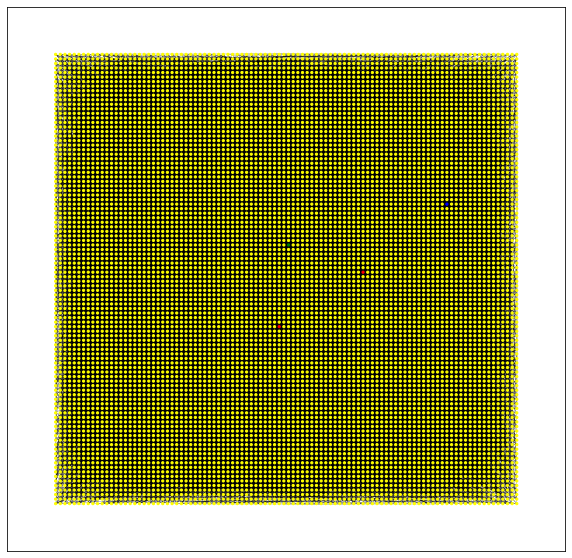

done 13


In [7]:
debug = False
population = Population(100,2,True)
print("Start")
flag = True
count = 0
rep=0
while flag and count<200:
    f = population.iterate()
    if f :
        rep =0
    else:
        rep += 1
    if rep == 4:
        flag = False
    if not debug :clear_output(wait=True)
    population.draw_network()
    if not debug :time.sleep(0.01)
    count+=1
print("done",count)

In [5]:
[(a.pos[0],a.pos[1],a.id) for a in population.agents[0].links]

[(99, 0, 9900), (1, 0, 100), (0, 99, 99), (0, 1, 1)]